In [11]:
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns
warnings.simplefilter("ignore", category=FutureWarning)

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Exercise 1

In [7]:
from sklearn import datasets, metrics, cluster, mixture
k_means = [2,3,4,5]
silhouette_scores = []
purities = []
y_preds = []

def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

for k in k_means:
    kmeans_algo = cluster.KMeans(n_clusters=k, random_state=0)
    kmeans_model = kmeans_algo.fit(X)
    y_pred = kmeans_model.labels_
    y_preds.append(y_pred)
    
    silhouette = metrics.silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette)
    
    purity = purity_score(y, y_pred)
    purities.append(purity)
    
print("Silhouettes per k:",silhouette_scores)
print("Purities per k:",purities)

Silhouettes per k: [0.36044124340441114, 0.29579055730002257, 0.27442402122340176, 0.23823928397844843]
Purities per k: [0.632258064516129, 0.667741935483871, 0.6612903225806451, 0.6774193548387096]


The highest silhouette value is for k = 2, this could mean that the data is better separated in two clusters. Also with the increase of the value of k, the silhouette score decreases, which means that the clusters are getting less distinct from each other.

As for the purity scores, these are relatively close to each other across all values of k. This suggests that regardless of the number of clusters chosen, the clusters tend to contain a variety of different classes within themselves.

# Exercise 2

## i)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = round(sum(explained_variance), 4) * 100
print('Explained Variance for first component:', explained_variance[0])
print('Explained Variance for second component:', explained_variance[1])
print(f'Total variability explained by the top two principal components: {total_explained_variance}%')

Explained Variance for first component: 0.5618144484299212
Explained Variance for second component: 0.20955952591361887
Total variability explained by the top two principal components: 77.14%


## ii)

In [43]:
loadings = np.abs(pca.components_)

top_vars_pc1 = np.argsort(loadings[0])[::-1]
top_vars_pc2 = np.argsort(loadings[1])[::-1]
variable_names = df.columns

print("Ranked variables for first component:")
for idx in top_vars_pc1:
    print('-', variable_names[idx])

print("\nRanked variables for second component:")
for idx in top_vars_pc2:
    print('-', variable_names[idx])

Ranked variables for first component:
- pelvic_incidence
- lumbar_lordosis_angle
- pelvic_tilt
- sacral_slope
- degree_spondylolisthesis
- pelvic_radius

Ranked variables for second component:
- pelvic_tilt
- pelvic_radius
- sacral_slope
- pelvic_incidence
- lumbar_lordosis_angle
- degree_spondylolisthesis


# Exercise 3

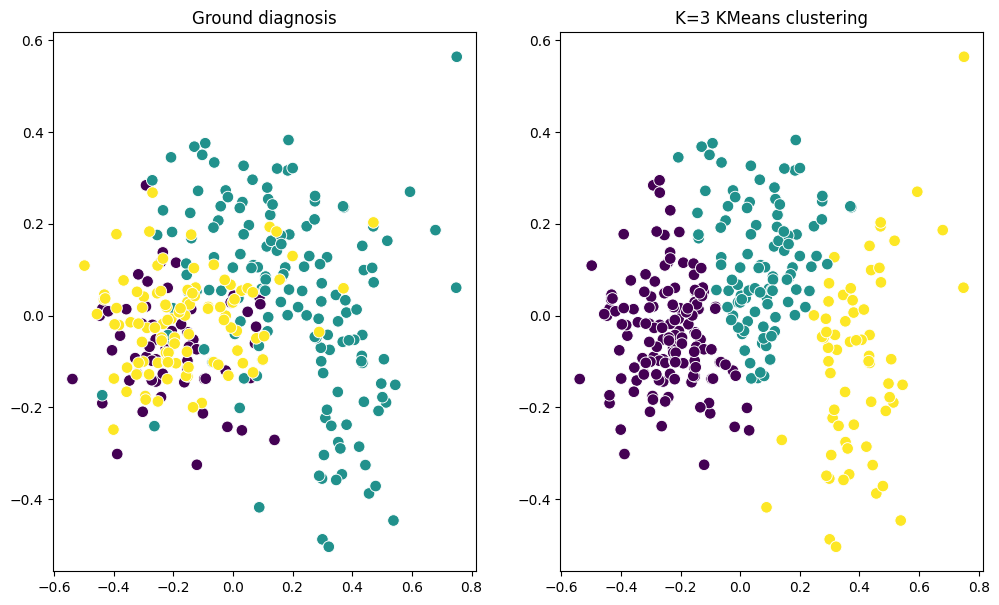

In [28]:
import matplotlib.pyplot as plt
codes = {'Hernia':0, 'Spondylolisthesis':1, 'Normal':2}
true_y = y.map(codes).tolist()
plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.title("Ground diagnosis")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], c=true_y, s=70)
plt.subplot(122)
plt.title("K=3 KMeans clustering")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], c=y_preds[1], s=70)
plt.show()

# Exercise 4

- Since the silhouette values represent how well-separated clusters are, and purity scores measure how well-defined the clusters are in terms of the actual classes, we can conclude that clustering can be used to characterize a population of ill and healthy individuals. More precisely, the silhouette score can tell us if our sample provides a good separation between the health status of individuals, and the purity can measure if the clusters can actually represent the ill and the healthy. This is particularly important, as mistreating any kind of information in this area can result in problematic consequences. 
Looking at Exercise 1, since the best silhouette value is for k=2, this could mean that the 'column_diagnosis' data can be better grouped into two different categories, which could be healthy  ill.
  
- By using PCA and clustering, visualizing the data in a reduced 2-dimensional space is possible. This allows us to assess if clusters are well-formed by looking at the points that comprise them specifically, in a way that is easily comprehensible. For example, in Exercise 3, we can see that for KMeans with a k value of 3, the points create clusters that appear quite concise. This implies that the algorithm can effectively differentiate groups from each other, much like characterizing a population by healthy and ill individuals.